In [4]:
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

In [97]:
gen_df = pd.read_csv('../Plant_2_Generation_Data.csv')
np.sum(gen_df.isnull())
print('No null values')
print(gen_df.describe())
#I shall leave only 1st 2 letters of the SOURCE KEY to reduce clutter
gen_df['SOURCE_KEY'] = gen_df['SOURCE_KEY'].str[0:2]
# I shall change date time, which is currently string values to date_time values
gen_df['DATE_TIME'] = pd.to_datetime(gen_df['DATE_TIME'])

#Added day column
gen_df['DATE'] = gen_df['DATE_TIME'].dt.date #Day

No null values
        PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count  67698.0    67698.000000  67698.000000  67698.000000  6.769800e+04
mean   4136001.0  246.701961    241.277825    3294.890295   6.589448e+08
std    0.0        370.569597    362.112118    2919.448386   7.296678e+08
min    4136001.0  0.000000      0.000000      0.000000      0.000000e+00
25%    4136001.0  0.000000      0.000000      272.750000    1.996494e+07
50%    4136001.0  0.000000      0.000000      2911.000000   2.826276e+08
75%    4136001.0  446.591667    438.215000    5534.000000   1.348495e+09
max    4136001.0  1420.933333   1385.420000   9873.000000   2.247916e+09


In [122]:
#calculates based on ID running mean and shifts it on x axis +1 (01, 02, 03 mean would be on 04)
def calculate_previous_w_mean(df, w):
    return (df.rolling(window=w).mean()).shift(periods=1)


day_acpower = gen_df[['DATE','AC_POWER', 'DC_POWER']]
grouped_by_date = day_acpower.groupby(day_acpower['DATE']).sum()

grouped_by_date['PRED_LAST_3_DAY_MEAN_AC'] = calculate_previous_w_mean(grouped_by_date,3)['AC_POWER']
grouped_by_date['PRED_LAST_3_DAY_MEAN_DC'] = calculate_previous_w_mean(grouped_by_date,3)['DC_POWER']

#need to drop first 3 lines as they do not have a prediction
without_na_grouped_by_date = grouped_by_date.dropna()

MSE_AC_baseline = mean_squared_error(without_na_grouped_by_date['AC_POWER'], without_na_grouped_by_date['PRED_LAST_3_DAY_MEAN_AC'] )
MSE_DC_baseline = mean_squared_error(without_na_grouped_by_date['DC_POWER'], without_na_grouped_by_date['PRED_LAST_3_DAY_MEAN_DC'] )

print(f'Baseline MSE_AC: {MSE_AC_baseline}')
print(f'Baseline MSE_DC: {MSE_DC_baseline}')

Baseline MSE_AC: 7035358817.869589
Baseline MSE_DC: 7377207916.800532


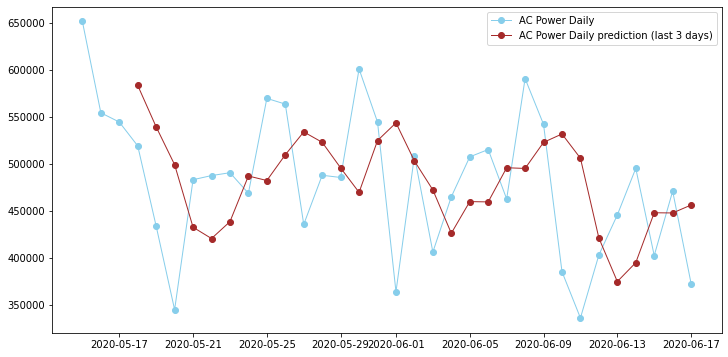

In [131]:
plt.figure(figsize=(12,6))
plt.plot( grouped_by_date.index, grouped_by_date['AC_POWER'], marker='o',  color='skyblue', linewidth=1)
plt.plot( grouped_by_date.index, grouped_by_date['PRED_LAST_3_DAY_MEAN_AC'], marker='o',  color='brown', linewidth=1)
plt.legend(['AC Power Daily','AC Power Daily prediction (last 3 days)'])


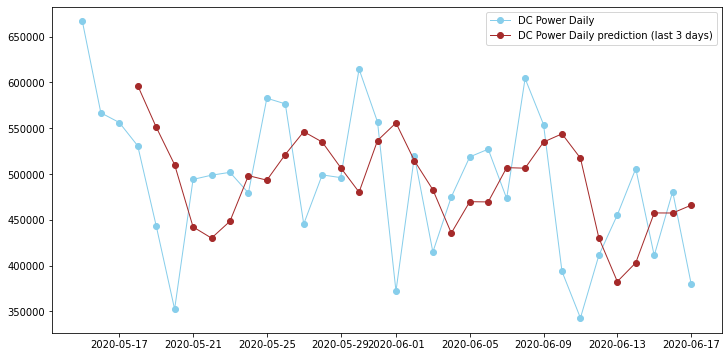

In [132]:
plt.figure(figsize=(12,6))
plt.plot( grouped_by_date.index, grouped_by_date['DC_POWER'], marker='o',  color='skyblue', linewidth=1)
plt.plot( grouped_by_date.index, grouped_by_date['PRED_LAST_3_DAY_MEAN_DC'], marker='o',  color='brown', linewidth=1)
plt.legend(['DC Power Daily','DC Power Daily prediction (last 3 days)'])
